In [1]:
using Distributed
addprocs(44);

In [2]:
using PulseInputDDM, MAT, Flatten

In [3]:
x_joint = Vector(undef, 3);
x_choice = Vector(undef, 3);

In [4]:
ratnames = ["B068","T034","T036","T063","T030", "T035","T011","B053", "T080","T103","E021"];
dt, n, cross = 1e-2, 53, false
data_path = joinpath(abspath(joinpath(pwd(), "..")), "data/by_session")
joint_model_path = joinpath(abspath(joinpath(pwd(), "..")), "models/joint");
choice_model_path = joinpath(abspath(joinpath(pwd(), "..")), "models/choice");

## FOF

In [5]:
region, delay = "FOF", 0
ratnum = 1:5
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_FOF, = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [6]:
file = joinpath(joint_model_path, "Fig2-FOF.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   
x_joint[1] = xf;
joint_model_FOF = neural_choiceDDM(θneural_choice(xf, f), data_FOF, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((46,))
  n: Int64 53
  cross: Bool false


In [7]:
file = joinpath(choice_model_path, region*".mat")
x_choice[1] = read(matopen(file), "ML_params");

In [8]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_FOF...), :input_data));
choice_data_FOF = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_FOF...), :choice));
choice_model_FOF = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[1]), data=choice_data_FOF, n=n, cross=cross);

## PPC

In [9]:
region, delay = "PPC", 0
ratnum = 6:8
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_PPC, = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, 
    filtSD=5, do_RBF=true);

In [10]:
file = joinpath(joint_model_path, "Fig2-PPC.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];  
x_joint[2] = xf;
joint_model_PPC = neural_choiceDDM(θneural_choice(xf, f), data_PPC, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((24,))
  n: Int64 53
  cross: Bool false


In [11]:
file = joinpath(choice_model_path, region*".mat")
x_choice[2] = read(matopen(file), "ML_params");

In [12]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_PPC...), :input_data));
choice_data_PPC = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_PPC...), :choice));
choice_model_PPC = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[2]), data=choice_data_PPC, n=n, cross=cross);

## ADS

In [13]:
region, delay = "ADS", 0
ratnum = 9:11
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_STR, = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [14]:
file = joinpath(joint_model_path, "Fig2-ADS.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   
x_joint[3] = xf;
joint_model_STR = neural_choiceDDM(θneural_choice(xf, f), data_STR, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((27,))
  n: Int64 53
  cross: Bool false


In [15]:
file = joinpath(choice_model_path, region*".mat")
x_choice[3] = read(matopen(file), "ML_params");

In [16]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_STR...), :input_data));
choice_data_STR = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_STR...), :choice));
choice_model_STR = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[3]), data=choice_data_STR, n=n, cross=cross);

## Trajectories

In [17]:
import PulseInputDDM: rand_a

In [18]:
ntrials = 10

10

In [19]:
a_joint_model_FOF = map(rng-> vcat(rand_a.(Ref(joint_model_FOF.θ.θz), joint_model_STR.θ.θy, 
            joint_model_STR.data, rng)...), 1:ntrials);

a_joint_model_STR = map(rng-> vcat(rand_a.(Ref(joint_model_STR.θ.θz), joint_model_STR.θ.θy, 
            joint_model_STR.data, rng)...), 1:ntrials);

a_joint_model_PPC = map(rng-> vcat(rand_a.(Ref(joint_model_PPC.θ.θz), joint_model_STR.θ.θy, 
            joint_model_STR.data, rng)...), 1:ntrials);

a_choice_model_FOF = map(rng-> vcat(rand_a.(Ref(choice_model_FOF.θ.θz), joint_model_STR.θ.θy, 
            joint_model_STR.data, rng)...), 1:ntrials);

a_choice_model_PPC = map(rng-> vcat(rand_a.(Ref(choice_model_PPC.θ.θz), joint_model_STR.θ.θy, 
            joint_model_STR.data, rng)...), 1:ntrials);

a_choice_model_STR = map(rng-> vcat(rand_a.(Ref(choice_model_STR.θ.θz), joint_model_STR.θ.θy, 
            joint_model_STR.data, rng)...), 1:ntrials);

In [20]:
using PyPlot, Colors
mycolors = ["red", "#1822A0", "#A01892"];

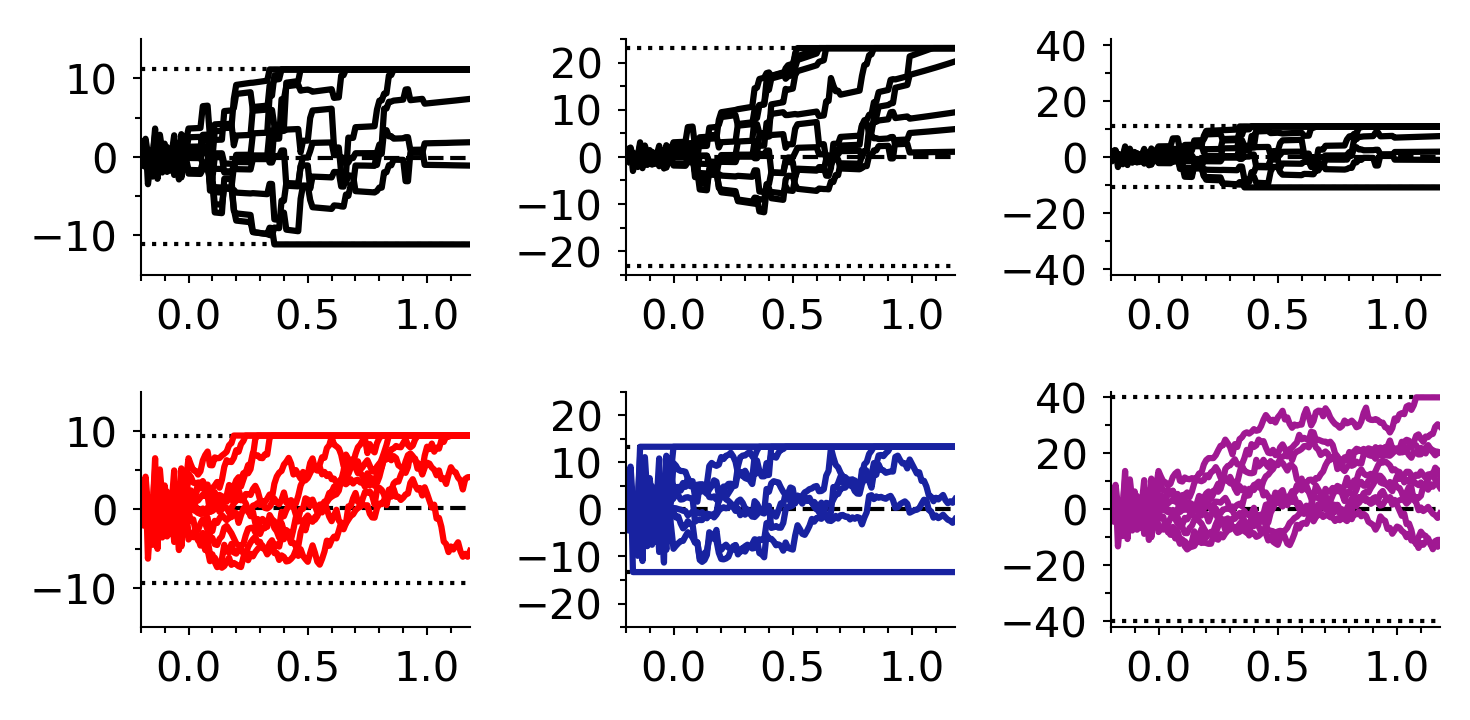

In [21]:
fig, ax = subplots(2, 3, figsize=(5, 2.5), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)
rc("font", family="sans-serif")

tri = 67;
T = length(a_choice_model_FOF[1][tri])

splt = 1
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), choice_model_FOF.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), -choice_model_FOF.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), choice_model_FOF.θ.bias * ones(100), Linewidth=1, 
    Linestyle="--", color="k");
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(a_choice_model_FOF, tri)[1:10],  color="k");

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-15,15)
ax[splt].set_yticks(range(-10, stop=10, length=3), minor=false)
ax[splt].set_yticks(range(-10, stop=10, length=5), minor=true)

splt = 2
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), joint_model_FOF.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), -joint_model_FOF.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), joint_model_FOF.θ.bias * ones(100), Linewidth=1, 
    Linestyle="--", color="k");
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(a_joint_model_FOF, tri)[1:10],  color=mycolors[1]);

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-15,15)
ax[splt].set_yticks(range(-10, stop=10, length=3), minor=false)
ax[splt].set_yticks(range(-10, stop=10, length=5), minor=true)

tri = 67;
T = length(a_choice_model_PPC[1][tri])

splt = 3
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), choice_model_PPC.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), -choice_model_PPC.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), choice_model_PPC.θ.bias * ones(100), Linewidth=1, 
    Linestyle="--", color="k");
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(a_choice_model_PPC, tri)[1:10],  color="k");

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-25,25)
ax[splt].set_yticks(range(-20, stop=20, length=5), minor=false)
ax[splt].set_yticks(range(-25, stop=25, length=11), minor=true)

splt = 4
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), joint_model_PPC.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), -joint_model_PPC.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), joint_model_PPC.θ.bias * ones(100), Linewidth=1, 
    Linestyle="--", color="k");
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(a_joint_model_PPC, tri)[1:10],  color=mycolors[2]);

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-25,25)
ax[splt].set_yticks(range(-20, stop=20, length=5), minor=false)
ax[splt].set_yticks(range(-25, stop=25, length=11), minor=true)

tri = 67;
T = length(a_choice_model_STR[1][tri])

splt = 5
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), choice_model_STR.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), choice_model_STR.θ.bias * ones(100), Linewidth=1, 
    Linestyle="--", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), -choice_model_STR.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(a_choice_model_STR, tri)[1:10],  color="k");

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-42,42)
ax[splt].set_yticks(range(-40, stop=40, length=5), minor=false)
ax[splt].set_yticks(range(-40, stop=40, length=9), minor=true)

splt = 6
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), joint_model_STR.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), joint_model_STR.θ.bias * ones(100), Linewidth=1, 
    Linestyle="--", color="k");
ax[splt].plot(range(-0.2, stop=T*dt - 0.2, length=100), -joint_model_STR.θ.θz.B * ones(100), Linewidth=1, 
    Linestyle=":", color="k");
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(a_joint_model_STR, tri)[1:10],  color=mycolors[3]);

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-42,42)
ax[splt].set_yticks(range(-40, stop=40, length=5), minor=false)
ax[splt].set_yticks(range(-40, stop=40, length=9), minor=true)

tight_layout()

PyPlot.savefig(joinpath(abspath(joinpath(pwd(), "..")), "figs/")*"Fig3B-1.pdf")

In [22]:
tester = map(rng-> vcat(rand_a.(Ref(θz(0., 100., 0. -eps(), 0., 0., 1-eps(), 0.03)), joint_model_STR.θ.θy, 
            joint_model_STR.data, rng)...), 1:ntrials);

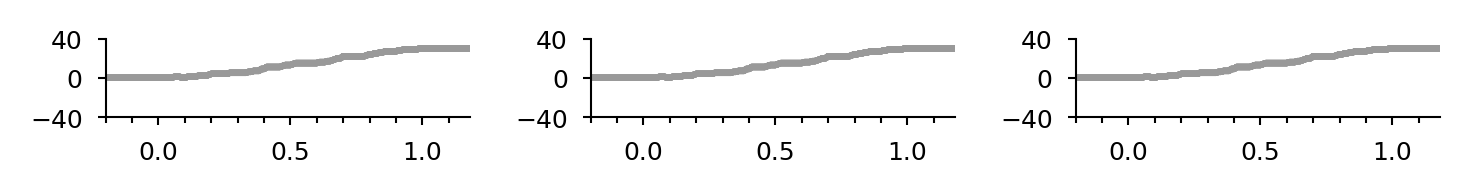

In [23]:
fig, ax = subplots(1, 3, figsize=(5, 0.75), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)
rc("font", family="sans-serif")

tri = 67;
T = length(a_choice_model_FOF[1][tri])

splt = 1
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(tester, tri)[1:10],  color=[0.6, 0.6, 0.6]);
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-35,35)
ax[splt].set_yticks(range(-40, stop=40, length=3), minor=false)

splt = 2
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(tester, tri)[1:10],  color=[0.6, 0.6, 0.6]);

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-35,35)
ax[splt].set_yticks(range(-40, stop=40, length=3), minor=false)

tri = 67;
T = length(a_choice_model_PPC[1][tri])

splt = 3
ax[splt].plot.(Ref(collect(1:T)*dt .- 0.2), getindex.(tester, tri)[1:10],  color=[0.6, 0.6, 0.6]);

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_xlim(-0.2, T*dt - 0.2)
ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(-0.2, stop=1.1, length=14), minor=true)
ax[splt].set_ylim(-35,35)
ax[splt].set_yticks(range(-40, stop=40, length=3), minor=false)

tight_layout()

PyPlot.savefig(joinpath(abspath(joinpath(pwd(), "..")), "figs/")*"Fig3B-2.pdf")